In [1]:
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'
data_dir = '/Users/iaincarmichael/data/courtlistener/'

import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import cPickle as pickle
from collections import Counter
import pandas as pd
import time
import copy


# graph package
import igraph as ig

# our code
sys.path.append(repo_directory + 'code/')
from setup_data_dir import setup_data_dir, make_subnetwork_directory
from pipeline.download_data import download_bulk_resource, download_master_edgelist, download_scdb
from helpful_functions import case_info
from viz import print_describe

sys.path.append(repo_directory + 'vertex_metrics_experiment/code/')
from results import *
from custom_vertex_metrics import *


# which network to download data for
network_name = 'scotus' # 'federal', 'ca1', etc


# some sub directories that get used
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'


# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

# number of cases per year

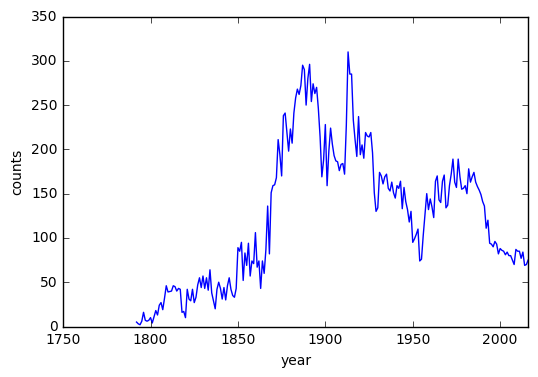

In [4]:

year_counts = Counter(G.vs['year'])

plt.plot(year_counts.keys(),
            year_counts.values())
plt.xlabel('year')
plt.xlim([1750, 2016])

plt.ylabel('counts')


# CiteRank time distribution

In [118]:
H = 5

cr = get_CiteRank(G, H)
years = G.vs['year']

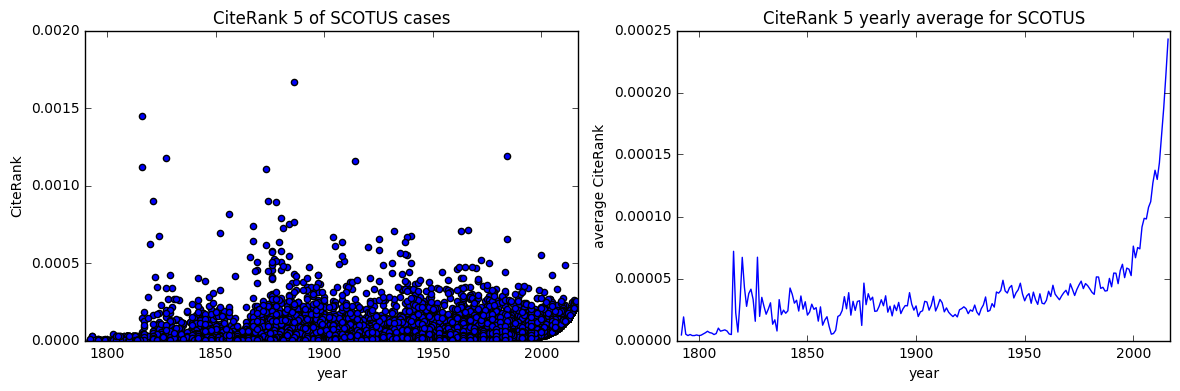

In [126]:
plt.figure(figsize=[14, 4])



plt.subplot(1,2,1)
plt.scatter(years, cr)
plt.xlim([1790, 2017])
plt.ylim([0, 1.2 * max(cr)])
plt.ylabel('CiteRank')
plt.xlabel('year')
plt.title("CiteRank %d of SCOTUS cases" % H)


plt.subplot(1,2,2)
plt.plot(cr_year_mean.index, cr_year_mean)
plt.ylabel('average CiteRank')
plt.xlabel('year')
plt.xlim([1790, 2017])
plt.title("CiteRank %d yearly average for SCOTUS" % H)


In [121]:

cr_year_mean = get_year_aggregate(years, cr, np.mean)
cr_year_median = get_year_aggregate(years, cr, np.median)

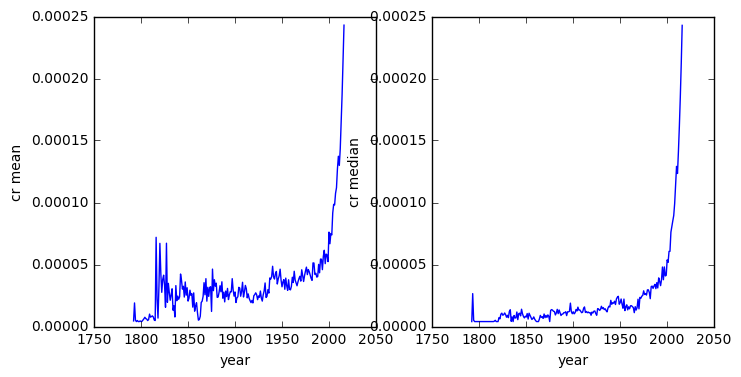

In [11]:
plt.figure(figsize=[8, 4])
plt.subplot(1,2,1)
plt.plot(cr_year_mean.index, cr_year_mean)
plt.ylabel('cr mean')
plt.xlabel('year')

plt.subplot(1,2,2)
plt.plot(cr_year_median.index, cr_year_median)
plt.ylabel('cr median')
plt.xlabel('year')

# outdegree

In [12]:
outdegree = G.outdegree()

In [13]:
print np.mean(outdegree)
print np.median(outdegree)

8.4027972027972027

# citation ages

In [113]:
diffs = [G.vs[e[0]]['year'] - G.vs[e[1]]['year'] for e in G.get_edgelist()]

In [114]:
print_describe(diffs)

nobs: 234312
mean: 23.326
median: 14.000
min: -9.000
max: 215.000
std: 26.076
unique values 216


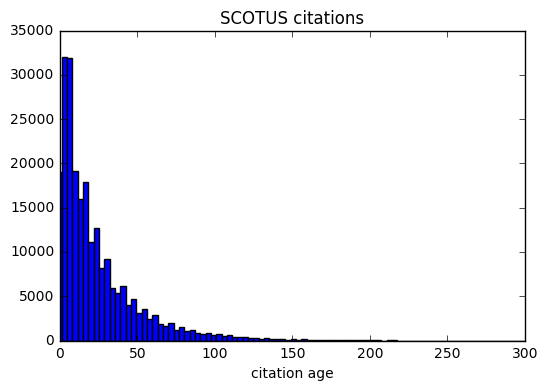

In [117]:
bins = np.linspace(-40, 300, 100)
plt.hist(diffs, bins=bins)
plt.xlim(0, 300)
plt.xlabel('citation age')
plt.title('SCOTUS citations')

# Closeness

In [77]:
from make_snapshots import *

In [13]:
%%time
close_all = G.closeness(mode="ALL")

CPU times: user 1min 59s, sys: 137 ms, total: 1min 59s
Wall time: 1min 59s


In [11]:
%%time
close_in = G.closeness(mode="IN")

CPU times: user 25.4 s, sys: 17.5 ms, total: 25.4 s
Wall time: 25.4 s


In [12]:
%%time
close_out = G.closeness(mode="OUT")

CPU times: user 20.6 s, sys: 6.4 ms, total: 20.6 s
Wall time: 20.6 s


# top citerank 

In [9]:
h = 5
cr = get_CiteRank(G, 5)
top_cr = pd.Series(cr, index=G.vs['name'])

In [10]:
for op_id in top_cr.sort_values(ascending=False)[:10].index:
    case_info(op_id)

Boyd v. United States
date_filed: 1886-02-01
https://www.courtlistener.com/opinion/91573/boyd-v-united-states/
The Samuel
date_filed: 1816-02-16
https://www.courtlistener.com/opinion/85131/the-samuel/
Chevron USA Inc. v. Natural Resources Defense Council, Inc.
date_filed: 1984-06-25
https://www.courtlistener.com/opinion/111221/chevron-usa-inc-v-natural-resources-defense-council-inc/
Brown v. Maryland
date_filed: 1827-03-12
https://www.courtlistener.com/opinion/85534/brown-v-maryland/
Weeks v. United States
date_filed: 1914-02-24
https://www.courtlistener.com/opinion/98094/weeks-v-united-states/
Martin v. Hunter's Lessee
date_filed: 1816-03-20
https://www.courtlistener.com/opinion/85160/martin-v-hunters-lessee/
Slaughter-House Cases
date_filed: 1873-04-14
https://www.courtlistener.com/opinion/88661/slaughter-house-cases/
Ex Parte Lange
date_filed: 1874-01-30
https://www.courtlistener.com/opinion/88804/ex-parte-lange/
Cohens v. Virginia
date_filed: 1821-03-18
https://www.courtlistener.co

# PageRank

In [190]:
years = np.array(G.vs['year'])
pr = np.array(G.pagerank(damping=.1))


cr = get_CiteRank(G, 20.0)
pcr = get_CiteRankPoly(G, 10.0)

pr_year_mean = get_year_aggregate(years, pr, np.mean)
pr_year_median = get_year_aggregate(years, pr, np.median)

(0, 4.4165525766541105e-05)

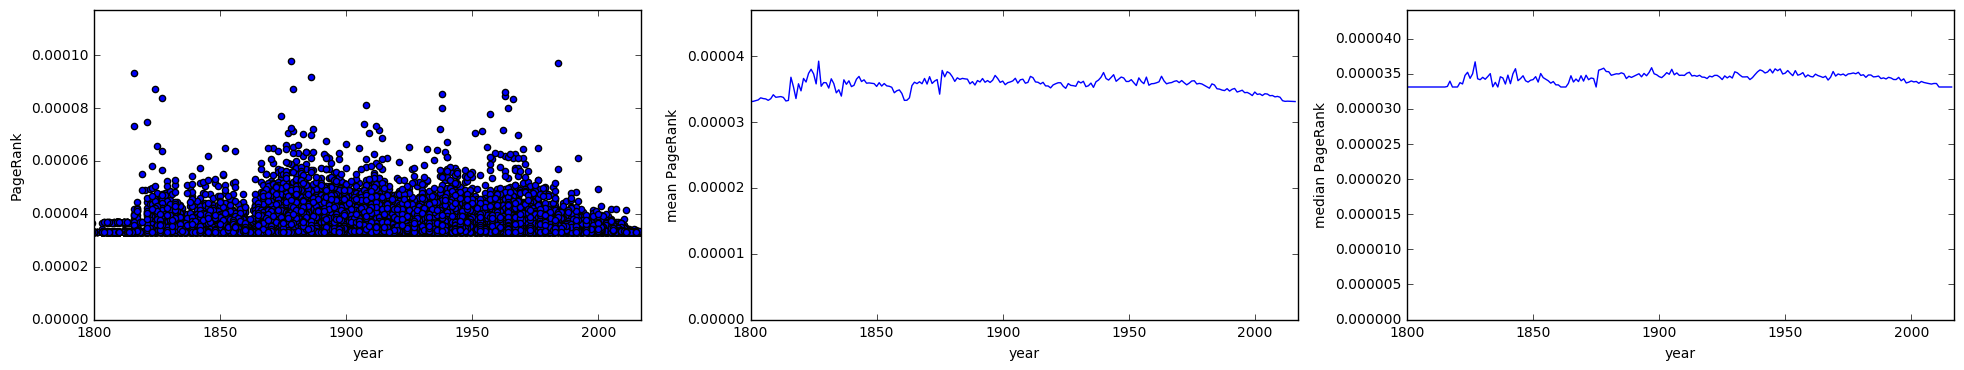

In [192]:
# page rank
plt.figure(figsize=[24,  4])

plt.subplot(1,3,1)
plt.scatter(years, pr)
plt.xlabel('year')
plt.ylabel('PageRank')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(pr)])


plt.subplot(1,3,2)
plt.plot(pr_year_mean.index, pr_year_mean)
plt.xlabel('year')
plt.ylabel('mean PageRank')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(pr_year_mean)])



plt.subplot(1,3,3)
plt.plot(pr_year_mean.index, pr_year_median)
plt.xlabel('year')
plt.ylabel('median PageRank')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(pr_year_median)])

In [193]:
indegree = np.array(G.indegree())

indeg_year_mean = get_year_aggregate(years, indegree, np.mean)
indeg_year_median = get_year_aggregate(years, indegree, np.median)

(0, 13.199999999999999)

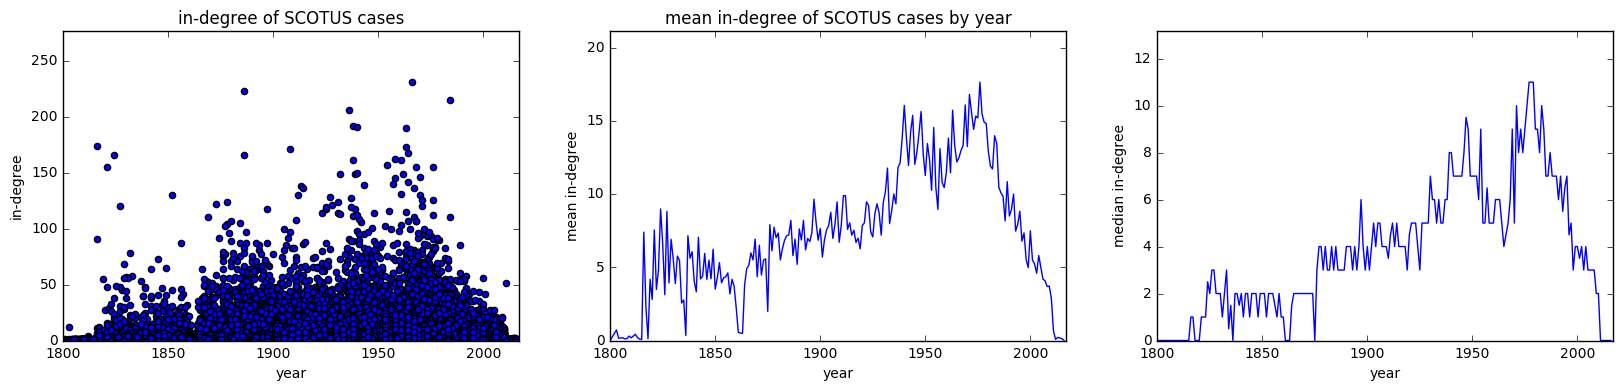

In [129]:
plt.figure(figsize=[20,  4])

plt.subplot(1,3,1)
plt.scatter(years, indegree)
plt.xlabel('year')
plt.ylabel('in-degree')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(indegree)])
plt.title("in-degree of SCOTUS cases")

plt.subplot(1,3,2)
plt.plot(indeg_year_mean.index, indeg_year_mean)
plt.xlabel('year')
plt.ylabel('mean in-degree')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(indeg_year_mean)])
plt.title("mean in-degree of SCOTUS cases by year")



plt.subplot(1,3,3)
plt.plot(indeg_year_median.index, indeg_year_median)
plt.xlabel('year')
plt.ylabel('median in-degree')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(indeg_year_median)])

In [133]:
indeg_year_mean[1980]

12.90566037735849

In [94]:
big_indeg = np.where((indegree >= 100) & (years <= 1850))[0].tolist()
big_pr = np.where((pr >= .0005) & (years <= 1850))[0].tolist()

In [97]:
G.vs[big_pr]['name']

['85283',
 '85160',
 '85534',
 '85382',
 '86317',
 '85631',
 '85330',
 '85451',
 '85131',
 '85516']

In [98]:
G.vs[big_indeg]['name']

['85534', '85330', '85451', '85131']

In [100]:
case_info(85534)
case_info(85330)
case_info(85451)
case_info(85131)

Brown v. Maryland
date_filed: 1827-03-12
https://www.courtlistener.com/opinion/85534/brown-v-maryland/
Cohens v. Virginia
date_filed: 1821-03-18
https://www.courtlistener.com/opinion/85330/cohens-v-virginia/
Osborn v. Bank of United States
date_filed: 1824-03-19
https://www.courtlistener.com/opinion/85451/osborn-v-bank-of-united-states/
The Samuel
date_filed: 1816-02-16
https://www.courtlistener.com/opinion/85131/the-samuel/


# CiteRankPoly

In [157]:
def blahh(G, exponent, p=.85):
    """
    Retuns the CiteRank of a graph
    (see https://arxiv.org/pdf/physics/0612122.pdf)

    CiteRank is a particular PersonalizedPage rank where the reset
    probabilities exponentially decay with age of the vertex.

    Parameters
    ----------
    G: igraph graph, assumes 'year' is a vertex atttribute

    exponent: the exponent of the decay i.e.
    reset_prob_i propto 1/(age + 1)^exponent

    Returns
    -------
    CiteRank
    """
    # years of each case
    years = np.array(G.vs['year'])
    current_year = max(years)

    # compute exponentially decaying probabilities
    ages = current_year - years
    weights = 1.0 / (1.0 + ages) ** exponent
    probs = weights / weights.sum()

    return G.personalized_pagerank(damping=p, reset=probs)

In [166]:
years = np.array(G.vs['year'])


# crp = get_CiteRankPoly(G, 10.0)

crp = blahh(G, 10.0, p=.95)


crp_year_mean = get_year_aggregate(years, crp, np.mean)
crp_year_median = get_year_aggregate(years, crp, np.median)

(0, 0.00080706725810313561)

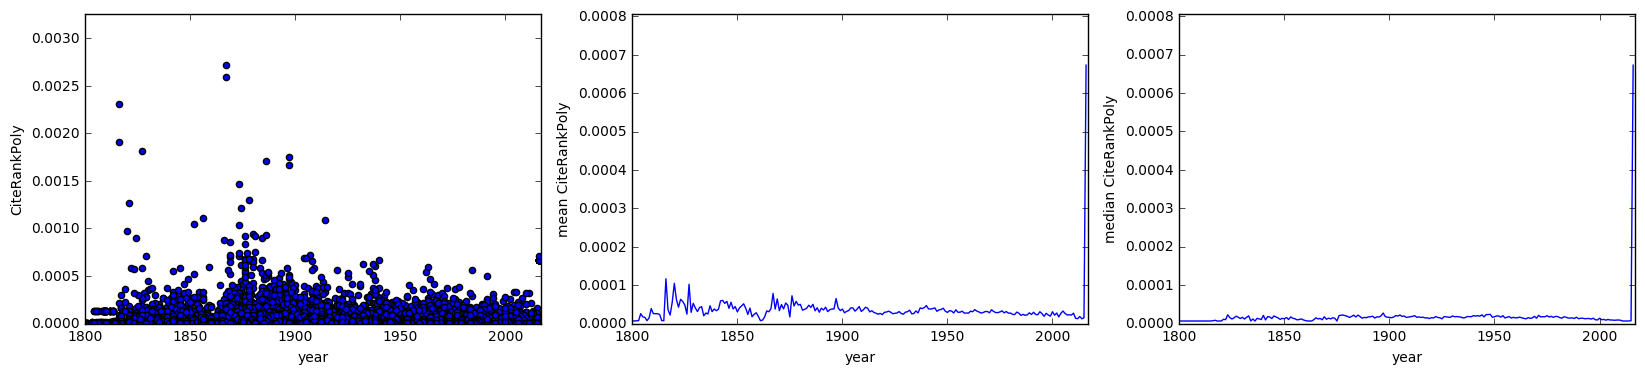

In [167]:
# page rank
plt.figure(figsize=[20,  4])

plt.subplot(1,3,1)
plt.scatter(years, crp)
plt.xlabel('year')
plt.ylabel('CiteRankPoly')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 * max(crp)])


plt.subplot(1,3,2)
plt.plot(crp_year_mean.index, crp_year_mean)
plt.xlabel('year')
plt.ylabel('mean CiteRankPoly')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(crp_year_mean)])



plt.subplot(1,3,3)
plt.plot(crp_year_mean.index, crp_year_median)
plt.xlabel('year')
plt.ylabel('median CiteRankPoly')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(crp_year_median)])

# Outdeg

In [97]:
outdegs = pd.Series(G.outdegree(), index=G.vs['name'])
outdegs.sort_values(ascending=False, inplace=True)

In [98]:
for i in range(10):
    case_info(outdegs.index[i])

Miller Brothers Co. v. Maryland
date_filed: 1954-05-03
https://www.courtlistener.com/opinion/105210/miller-brothers-co-v-maryland/
Commissioner v. Estate of Church
date_filed: 1949-02-14
https://www.courtlistener.com/opinion/104616/commissioner-v-estate-of-church/
Baker v. Carr
date_filed: 1962-03-26
https://www.courtlistener.com/opinion/106366/baker-v-carr/
Nebbia v. New York
date_filed: 1934-03-05
https://www.courtlistener.com/opinion/102224/nebbia-v-new-york/
McGautha v. California
date_filed: 1971-05-03
https://www.courtlistener.com/opinion/108329/mcgautha-v-california/
Crowell v. Benson
date_filed: 1932-02-23
https://www.courtlistener.com/opinion/101864/crowell-v-benson/
Communist Party of United States v. Subversive Activities Control Bd.
date_filed: 1961-10-09
https://www.courtlistener.com/opinion/106267/communist-party-of-united-states-v-subversive-activities-control-bd/
The Minnesota Rate Cases
date_filed: 1913-06-09
https://www.courtlistener.com/opinion/97966/the-minnesota-ra

# Data problems

## backward edges

In [ ]:

diffs = [G.vs[e[0]]['year'] - G.vs[e[1]]['year'] for e in G.get_edgelist()]

backward = np.where(np.array(diffs) < 0)

In [71]:
i = 10
bad_edge = G.es[backward[0][i]]

source = G.vs[bad_edge.source]
target = G.vs[bad_edge.target]

print source
case_info(source['name'])
print 
print target
case_info(target['name'])

igraph.Vertex(<igraph.Graph object at 0x119d3faf8>,345469,{'year': 1975.0, 'issueArea': nan, 'court': 'ca4', 'id': 'n345469', 'name': '373434'})
21 Fair empl.prac.cas. 895, 22 Empl. Prac. Dec. P 30,563
date_filed: 1975-06-25
https://www.courtlistener.com/opinion/373434/21-fair-emplpraccas-895-22-empl-prac-dec-p-30563/

igraph.Vertex(<igraph.Graph object at 0x119d3faf8>,309424,{'year': 1978.0, 'issueArea': nan, 'court': 'ca4', 'id': 'n309424', 'name': '360466'})
Donald L. Cale v. The City of Covington, Virginia
date_filed: 1978-11-03
https://www.courtlistener.com/opinion/360466/donald-l-cale-v-the-city-of-covington-virginia/
